In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import UnrotatedSurfaceCode, ThresholdLAB

In [2]:
rsc = UnrotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

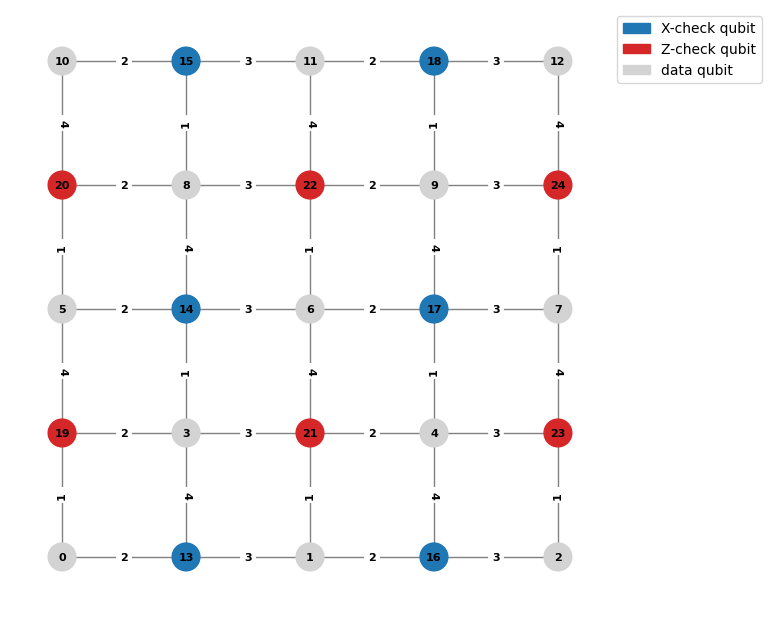

In [3]:
rsc.draw_graph()

In [4]:
rsc.build_memory_circuit(number_of_rounds=2)
rsc.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.01)---------------------@-DEPOLARIZE2(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)------------M:rec[24]-DETECTOR:D18=rec[24]*rec[27]*rec[25]*rec[12]---------OBSERVABLE_INCLUDE:L0*=rec[24]*rec[28]*rec[32]-
                                              | |                                                                                                                                                                                                                                                                                     | |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | |                                                                                                                                                                                                                                                                                     | |
 q1: -R-DEPOLARIZE1(0.01)---------------------|-|-----------------@-DEPOLARIZE2(0.01)-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-|-----------------X-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------@-DEPOLARIZE2(0.01)--------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
th = ThresholdLAB(
    distances= [3, 5, 7, 11],
    code=UnrotatedSurfaceCode,
    error_rates= np.linspace(0, 0.02, 10)
)

th.collect_stats(num_shots=10**4)

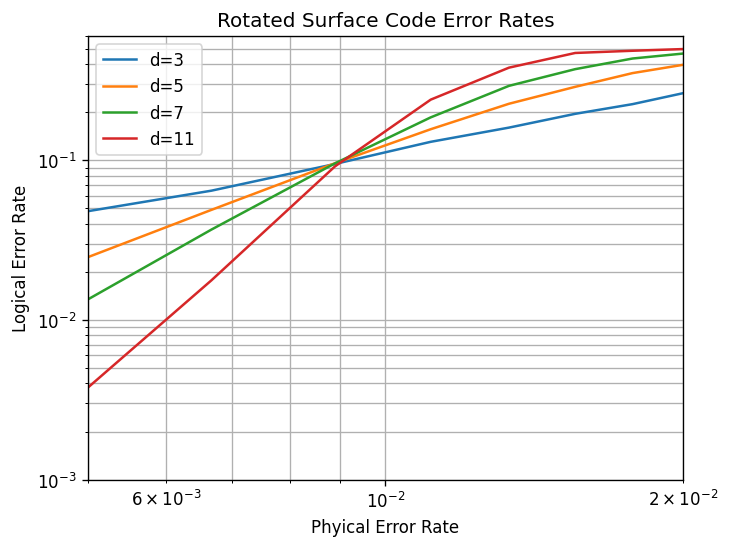

In [6]:
th.plot_stats(
    x_min = 5e-3, 
    x_max = 2e-2,
    y_min = 1e-3, 
    y_max = 6e-1
)